In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV

from data_reader import read_data
from data_preprocessing import preprocess_data
from feature_extractor import extract_features

%matplotlib inline

In [50]:
data = preprocess_data(read_data())
data.head()

,id,Title,Uri,PublicationDateTimeUTC,ProcedureDisplayName,Amount,RubPrice,CurrencyCode,StatusDisplayName,StatusCode,SuppliersCount,IsWinner
0,0100600000117000001,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000001,2017-04-13,Закупка у единственного поставщика (подрядчика...,1310000.0,1310000.0,RUB,Размещение завершено,2.0,0.0,0.0
1,0100600000117000002,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000002,2017-04-13,Закупка у единственного поставщика (подрядчика...,249000.0,249000.0,RUB,Размещение завершено,2.0,0.0,0.0
2,0100600000117000003,"Закупки товаров, работ, услуг в соответствии с...",https://zakupki.kontur.ru/0100600000117000003,2017-07-06,Закупка у единственного поставщика (подрядчика...,250000.0,250000.0,RUB,Размещение завершено,2.0,0.0,0.0
3,0100600000117000004,Выполнение работ по ремонту автомобильной доро...,https://zakupki.kontur.ru/0100600000117000004,2017-07-06,Запрос котировок,400300.0,400300.0,RUB,Размещение завершено,2.0,2.0,1.0
4,0100600000117000005,Приобретение и установка спортивного оборудования,https://zakupki.kontur.ru/0100600000117000005,2017-07-10,Запрос котировок,451000.0,451000.0,RUB,Размещение завершено,2.0,1.0,0.0


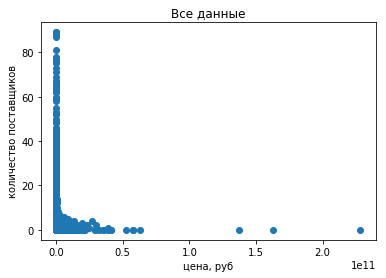

In [51]:
plt.scatter(data['RubPrice'], data['SuppliersCount'])
plt.title("Все данные")
plt.xlabel("цена, руб")
plt.ylabel("количество поставщиков")
plt.show()

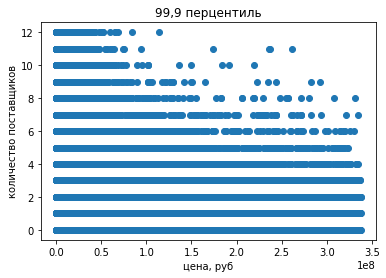

In [52]:
data_nn = data[(~np.isnan(data['RubPrice'])) & (~np.isnan(data['SuppliersCount']))]
data95 = data_nn[(data_nn['RubPrice'] < np.percentile(data_nn['RubPrice'], 99.9)) &
                 (data_nn['SuppliersCount'] < np.percentile(data_nn['SuppliersCount'], 99.9))]
plt.scatter(data95['RubPrice'], data95['SuppliersCount'])
plt.title("99,9 перцентиль")
plt.xlabel("цена, руб")
plt.ylabel("количество поставщиков")
plt.show()

In [32]:
data = data.head(1000000)
features = extract_features(data)

In [33]:
def ngrams(data, column):
    return data.columns[data.columns.str.startswith(f'Ngrams_{column}_')].tolist()

def onehots(data, column):
    return data.columns[data.columns.str.startswith(f'OneHot_{column}_')].tolist()

In [34]:
X = features[ngrams(features, 'Title') + ['RubPrice']]
y = data['SuppliersCount']

In [35]:
cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-2.8902370419471808

In [36]:
cross_val_score(DummyRegressor(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-3.7368879093207781

In [37]:
# from sklearn.svm import LinearSVR
# cross_val_score(LinearSVR(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [38]:
# from sklearn.ensemble import RandomForestRegressor
# cross_val_score(RandomForestRegressor(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [39]:
X = features[ngrams(features, 'Title') + ngrams(features, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-2.5711232120193181

In [40]:
X = features[ngrams(features, 'Title') + onehots(features, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-2.5711032399419937

In [41]:
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_absolute_error').mean()

-1.0970765962487146

In [42]:
X = features[ngrams(features, 'Title') + ngrams(features, 'ProcedureDisplayName')]
cross_val_score(Lasso(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-3.7368879093207781

In [43]:
X = features[ngrams(features, 'Title') + onehots(features, 'ProcedureDisplayName')]
cross_val_score(Lasso(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-3.7368879093207781

In [ ]:
# param_grid = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
# optimizer = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=3)
# optimizer.fit(X, y)
# optimizer.best_estimator_.coef_, optimizer.best_score_

In [ ]:
X = features[ngrams(features, 'Title') + onehots(features, 'ProcedureDisplayName') + ['RubPrice']]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()